In [18]:
#Risk and Returns analytics of stock portfolio during Covid Period 2020-2023, an example. 

In [19]:
import os
os.getcwd()

'/home/shaker'

In [20]:
os.chdir('/home/shaker')

In [21]:
os.getcwd()

'/home/shaker'

In [22]:
import warnings
warnings.filterwarnings('ignore')

In [23]:
##Importing Python packages

In [126]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
%matplotlib inline
import pandas_datareader.data as collect

import csv
import numpy.random as npr
import datetime as dt
import scipy.stats as stats
from scipy.stats import norm

In [27]:
##downloading stock prices through yfinance from yahoo finance\
## Stocks & indices with highest average volume of options traded have been chosen in the portfolio analyzed below.

In [149]:
## Period is chosen to be 20 years which includes both financial crisis 2008 & the Covid Crisis Period ranging from 2020 to 2023##
years = 20

lastDate = dt.datetime.now()
firstDate = lastDate - dt.timedelta(days=365*years)
symbols = ["TSLA", "AMD", "NVDA", "AAPL", "MSFT", "SOFI", "AMZN", "C", "GOOGL", "BAC", "PFE", "GOOG", "META", "MARA", "BA", "SBUX", "INTC", "BABA", "NFLX", "PLTR", "SPY", "QQQ", "IWM", "TLT", "EEM", "HYG", "TQQQ", "SQQQ", "XLF", "SOXL", "^SPX","^DJI", "^VIX", "BTC-USD", "FXI", "CL=F"]
##"GC=F"
df = pd.DataFrame()
for symbol in symbols:
    data = yf.download(symbol, start=firstDate, end=lastDate)
    df[symbol] = data['Adj Close']

print(df)

df.info()
df.head()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

               TSLA      AMD     NVDA     AAPL     MSFT   SOFI     AMZN  \
Date                                                                      
2010-06-29   1.5927   7.4800   2.4034   7.7455  17.8430    NaN   5.4305   
2010-06-30   1.5887   7.3200   2.3415   7.6052  17.6133    NaN   5.4630   
2010-07-01   1.4640   7.3900   2.3805   7.5130  17.7281    NaN   5.5480   
2010-07-02   1.2800   7.1700   2.3507   7.4664  17.8123    NaN   5.4570   
2010-07-06   1.0740   7.0400   2.3255   7.5175  18.2334    NaN   5.5030   
...             ...      ...      ...      ...      ...    ...      ...   
2024-02-06 185.1000 167.8800 682.2300 189.0588 405.4900 7.8000 169.1500   
2024-02-07 187.5800 170.9400 700.9900 189.1686 414.0500 7.6600 170.5300   
2024-02-08 189.5600 169.3500 696.4100 188.0800 414.1100 8.0800 169.8400   
2024-02-09 193.5700 172.4800 721.3300 188.8500 420.5500 8.1300 174.4500   
2024-02-12 188.1300 171.9100 722.4800 187.1500 415.2600 8.3300 172.3400   

                 C    GO

,TSLA,AMD,NVDA,AAPL,MSFT,SOFI,AMZN,C,GOOGL,BAC,...,TQQQ,SQQQ,XLF,SOXL,^SPX,^DJI,^VIX,BTC-USD,FXI,CL=F
Date,,,,,,,,,,,,,,,,,,,,,
2010-06-29,1.5927,7.4800,2.4034,7.7455,17.8430,NaN,5.4305,29.2246,11.3679,11.8714,...,0.3949,"395,928.3125",8.8479,0.4576,"1,041.2400","9,870.2998",34.1300,NaN,28.1808,75.9400
2010-06-30,1.5887,7.3200,2.3415,7.6052,17.6133,NaN,5.4630,29.4597,11.1349,11.7084,...,0.3754,"415,357.5000",8.7403,0.4355,"1,030.7100","9,774.0195",34.5400,NaN,28.0517,75.6300
2010-07-01,1.4640,7.3900,2.3805,7.5130,17.7281,NaN,5.5480,29.6164,10.9982,11.4232,...,0.3717,"419,289.6562",8.6580,0.4372,"1,027.3700","9,732.5303",32.8600,NaN,28.2310,72.9500
2010-07-02,1.2800,7.1700,2.3507,7.4664,17.8123,NaN,5.4570,29.6947,10.9247,11.2766,...,0.3697,"422,759.1875",8.5567,0.4318,"1,022.5800","9,686.4805",30.1200,NaN,27.9729,72.1400
2010-07-06,1.0740,7.0400,2.3255,7.5175,18.2334,NaN,5.5030,29.6947,10.9127,11.4558,...,0.3716,"418,827.0312",8.6074,0.4310,"1,028.0601","9,743.6201",29.6500,NaN,28.5034,71.9800


In [150]:
df.to_csv("stocks_with_high_option_volume.csv")
pd.options.display.float_format = '{:,.4f}'.format
plt.style.use("ggplot")

df = pd.read_csv("stocks_with_high_option_volume.csv", header = [0,1], index_col = 0, parse_dates = [0])

df = df.dropna()
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 782 entries, 2021-01-04 to 2024-02-12
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   (TSLA, 1.5926669836044312)      782 non-null    float64
 1   (AMD, 7.480000019073486)        782 non-null    float64
 2   (NVDA, 2.40344500541687)        782 non-null    float64
 3   (AAPL, 7.745479583740234)       782 non-null    float64
 4   (MSFT, 17.842971801757812)      782 non-null    float64
 5   (SOFI, Unnamed: 6_level_1)      782 non-null    float64
 6   (AMZN, 5.430500030517578)       782 non-null    float64
 7   (C, 29.224599838256836)         782 non-null    float64
 8   (GOOGL, 11.367868423461914)     782 non-null    float64
 9   (BAC, 11.871369361877441)       782 non-null    float64
 10  (PFE, 8.070008277893066)        782 non-null    float64
 11  (GOOG, 11.314091682434082)      782 non-null    float64
 12  (META, Unnamed: 1

In [151]:


price = pd.read_csv("stocks_with_high_option_volume.csv", index_col = "Date", parse_dates = [0]) ## Assuming adjusted closing price as daily price to investigate risk and return
price

,TSLA,AMD,NVDA,AAPL,MSFT,SOFI,AMZN,C,GOOGL,BAC,...,TQQQ,SQQQ,XLF,SOXL,^SPX,^DJI,^VIX,BTC-USD,FXI,CL=F
Date,,,,,,,,,,,,,,,,,,,,,
2010-06-29,1.5927,7.4800,2.4034,7.7455,17.8430,NaN,5.4305,29.2246,11.3679,11.8714,...,0.3949,"395,928.3125",8.8479,0.4576,"1,041.2400","9,870.2998",34.1300,NaN,28.1808,75.9400
2010-06-30,1.5887,7.3200,2.3415,7.6052,17.6133,NaN,5.4630,29.4597,11.1349,11.7084,...,0.3754,"415,357.5000",8.7403,0.4355,"1,030.7100","9,774.0195",34.5400,NaN,28.0517,75.6300
2010-07-01,1.4640,7.3900,2.3805,7.5130,17.7281,NaN,5.5480,29.6164,10.9982,11.4232,...,0.3717,"419,289.6562",8.6580,0.4372,"1,027.3700","9,732.5303",32.8600,NaN,28.2310,72.9500
2010-07-02,1.2800,7.1700,2.3507,7.4664,17.8123,NaN,5.4570,29.6947,10.9247,11.2766,...,0.3697,"422,759.1875",8.5567,0.4318,"1,022.5800","9,686.4805",30.1200,NaN,27.9729,72.1400
2010-07-06,1.0740,7.0400,2.3255,7.5175,18.2334,NaN,5.5030,29.6947,10.9127,11.4558,...,0.3716,"418,827.0312",8.6074,0.4310,"1,028.0601","9,743.6201",29.6500,NaN,28.5034,71.9800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-06,185.1000,167.8800,682.2300,189.0588,405.4900,7.8000,169.1500,54.3500,144.1000,33.0400,...,56.6200,11.8600,38.8300,33.8300,"4,954.2300","38,521.3594",13.0600,"43,084.6719",23.1300,73.3100
2024-02-07,187.5800,170.9400,700.9900,189.1686,414.0500,7.6600,170.5300,54.5400,145.5400,33.1800,...,58.3100,11.5100,39.1200,35.3600,"4,995.0601","38,677.3594",12.8300,"44,318.2227",22.6200,73.8600
2024-02-08,189.5600,169.3500,696.4100,188.0800,414.1100,8.0800,169.8400,54.2900,145.9100,33.1200,...,58.5500,11.4500,38.9700,37.1500,"4,997.9102","38,726.3281",12.7900,"45,301.5664",22.1000,76.2200


In [152]:
price.head()

,TSLA,AMD,NVDA,AAPL,MSFT,SOFI,AMZN,C,GOOGL,BAC,...,TQQQ,SQQQ,XLF,SOXL,^SPX,^DJI,^VIX,BTC-USD,FXI,CL=F
Date,,,,,,,,,,,,,,,,,,,,,
2010-06-29,1.5927,7.4800,2.4034,7.7455,17.8430,NaN,5.4305,29.2246,11.3679,11.8714,...,0.3949,"395,928.3125",8.8479,0.4576,"1,041.2400","9,870.2998",34.1300,NaN,28.1808,75.9400
2010-06-30,1.5887,7.3200,2.3415,7.6052,17.6133,NaN,5.4630,29.4597,11.1349,11.7084,...,0.3754,"415,357.5000",8.7403,0.4355,"1,030.7100","9,774.0195",34.5400,NaN,28.0517,75.6300
2010-07-01,1.4640,7.3900,2.3805,7.5130,17.7281,NaN,5.5480,29.6164,10.9982,11.4232,...,0.3717,"419,289.6562",8.6580,0.4372,"1,027.3700","9,732.5303",32.8600,NaN,28.2310,72.9500
2010-07-02,1.2800,7.1700,2.3507,7.4664,17.8123,NaN,5.4570,29.6947,10.9247,11.2766,...,0.3697,"422,759.1875",8.5567,0.4318,"1,022.5800","9,686.4805",30.1200,NaN,27.9729,72.1400
2010-07-06,1.0740,7.0400,2.3255,7.5175,18.2334,NaN,5.5030,29.6947,10.9127,11.4558,...,0.3716,"418,827.0312",8.6074,0.4310,"1,028.0601","9,743.6201",29.6500,NaN,28.5034,71.9800


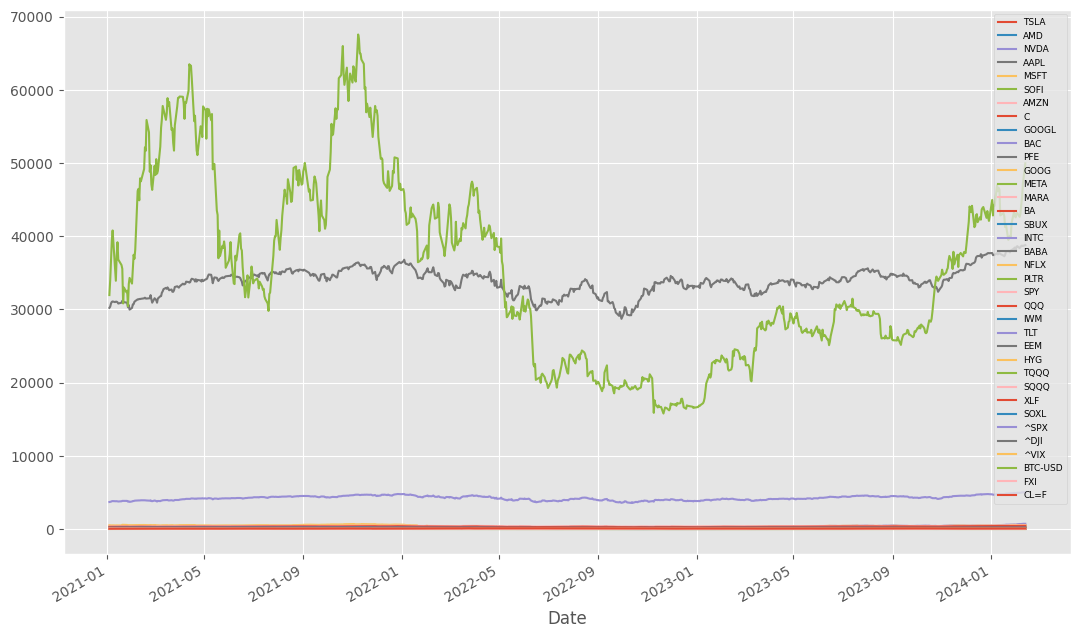

In [153]:

price.dropna().plot(figsize = (13, 8), fontsize = 10)
plt.legend(fontsize = 6.5)
plt.show()

In [154]:
price.dropna().info

<bound method DataFrame.info of                TSLA      AMD     NVDA     AAPL     MSFT    SOFI     AMZN  \
Date                                                                       
2021-01-04 243.2567  92.3000 130.8401 127.0021 211.9966 12.2000 159.3315   
2021-01-05 245.0367  92.7700 133.7461 128.5723 212.2011 12.1500 160.9255   
2021-01-06 251.9933  90.3300 125.8613 124.2444 206.6989 12.1200 156.9190   
2021-01-07 272.0133  95.1600 133.1399 128.4840 212.5809 19.1400 158.1080   
2021-01-08 293.3400  94.5800 132.4689 129.5930 213.8761 18.7400 159.1350   
...             ...      ...      ...      ...      ...     ...      ...   
2024-02-06 185.1000 167.8800 682.2300 189.0588 405.4900  7.8000 169.1500   
2024-02-07 187.5800 170.9400 700.9900 189.1686 414.0500  7.6600 170.5300   
2024-02-08 189.5600 169.3500 696.4100 188.0800 414.1100  8.0800 169.8400   
2024-02-09 193.5700 172.4800 721.3300 188.8500 420.5500  8.1300 174.4500   
2024-02-12 188.1300 171.9100 722.4800 187.1500 415.2600 

In [155]:
price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3429 entries, 2010-06-29 to 2024-02-12
Data columns (total 36 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   TSLA     3429 non-null   float64
 1   AMD      3429 non-null   float64
 2   NVDA     3429 non-null   float64
 3   AAPL     3429 non-null   float64
 4   MSFT     3429 non-null   float64
 5   SOFI     782 non-null    float64
 6   AMZN     3429 non-null   float64
 7   C        3429 non-null   float64
 8   GOOGL    3429 non-null   float64
 9   BAC      3429 non-null   float64
 10  PFE      3429 non-null   float64
 11  GOOG     3429 non-null   float64
 12  META     2952 non-null   float64
 13  MARA     2962 non-null   float64
 14  BA       3429 non-null   float64
 15  SBUX     3429 non-null   float64
 16  INTC     3429 non-null   float64
 17  BABA     2365 non-null   float64
 18  NFLX     3429 non-null   float64
 19  PLTR     847 non-null    float64
 20  SPY      3429 non-null   float64
 

In [156]:
np.log(price / price.shift()).info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3429 entries, 2010-06-29 to 2024-02-12
Data columns (total 36 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   TSLA     3428 non-null   float64
 1   AMD      3428 non-null   float64
 2   NVDA     3428 non-null   float64
 3   AAPL     3428 non-null   float64
 4   MSFT     3428 non-null   float64
 5   SOFI     781 non-null    float64
 6   AMZN     3428 non-null   float64
 7   C        3428 non-null   float64
 8   GOOGL    3428 non-null   float64
 9   BAC      3428 non-null   float64
 10  PFE      3428 non-null   float64
 11  GOOG     3428 non-null   float64
 12  META     2951 non-null   float64
 13  MARA     2961 non-null   float64
 14  BA       3428 non-null   float64
 15  SBUX     3428 non-null   float64
 16  INTC     3428 non-null   float64
 17  BABA     2364 non-null   float64
 18  NFLX     3428 non-null   float64
 19  PLTR     846 non-null    float64
 20  SPY      3428 non-null   float64
 

In [157]:
price.apply(lambda x: np.log(x.dropna() / x.dropna().shift())).info() 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3429 entries, 2010-06-29 to 2024-02-12
Data columns (total 36 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   TSLA     3428 non-null   float64
 1   AMD      3428 non-null   float64
 2   NVDA     3428 non-null   float64
 3   AAPL     3428 non-null   float64
 4   MSFT     3428 non-null   float64
 5   SOFI     781 non-null    float64
 6   AMZN     3428 non-null   float64
 7   C        3428 non-null   float64
 8   GOOGL    3428 non-null   float64
 9   BAC      3428 non-null   float64
 10  PFE      3428 non-null   float64
 11  GOOG     3428 non-null   float64
 12  META     2951 non-null   float64
 13  MARA     2961 non-null   float64
 14  BA       3428 non-null   float64
 15  SBUX     3428 non-null   float64
 16  INTC     3428 non-null   float64
 17  BABA     2364 non-null   float64
 18  NFLX     3428 non-null   float64
 19  PLTR     846 non-null    float64
 20  SPY      3428 non-null   float64
 

In [158]:
returns = price.apply(lambda x: np.log(x.dropna() / x.dropna().shift())) ## using Lambda to calculate log returns & drop Nans
returns

,TSLA,AMD,NVDA,AAPL,MSFT,SOFI,AMZN,C,GOOGL,BAC,...,TQQQ,SQQQ,XLF,SOXL,^SPX,^DJI,^VIX,BTC-USD,FXI,CL=F
Date,,,,,,,,,,,,,,,,,,,,,
2010-06-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-06-30,-0.0025,-0.0216,-0.0261,-0.0183,-0.0130,NaN,0.0060,0.0080,-0.0207,-0.0138,...,-0.0507,0.0479,-0.0122,-0.0496,-0.0102,-0.0098,0.0119,NaN,-0.0046,-0.0041
2010-07-01,-0.0817,0.0095,0.0165,-0.0122,0.0065,NaN,0.0154,0.0053,-0.0123,-0.0247,...,-0.0098,0.0094,-0.0095,0.0039,-0.0032,-0.0043,-0.0499,NaN,0.0064,-0.0361
2010-07-02,-0.1343,-0.0302,-0.0126,-0.0062,0.0047,NaN,-0.0165,0.0026,-0.0067,-0.0129,...,-0.0055,0.0082,-0.0118,-0.0124,-0.0047,-0.0047,-0.0871,NaN,-0.0092,-0.0112
2010-07-06,-0.1755,-0.0183,-0.0108,0.0068,0.0234,NaN,0.0084,0.0000,-0.0011,0.0158,...,0.0052,-0.0093,0.0059,-0.0018,0.0053,0.0059,-0.0157,NaN,0.0188,-0.0022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-06,0.0221,-0.0371,-0.0161,0.0086,-0.0004,0.0286,-0.0068,-0.0028,0.0029,0.0015,...,-0.0058,0.0068,0.0021,-0.0369,0.0023,0.0037,-0.0456,0.0099,0.0556,0.0073
2024-02-07,0.0133,0.0181,0.0271,0.0006,0.0209,-0.0181,0.0081,0.0035,0.0099,0.0042,...,0.0294,-0.0300,0.0074,0.0442,0.0082,0.0040,-0.0178,0.0282,-0.0223,0.0075
2024-02-08,0.0105,-0.0093,-0.0066,-0.0058,0.0001,0.0534,-0.0041,-0.0046,0.0025,-0.0018,...,0.0041,-0.0052,-0.0038,0.0494,0.0006,0.0013,-0.0031,0.0219,-0.0233,0.0315


In [159]:
returns.describe()

,TSLA,AMD,NVDA,AAPL,MSFT,SOFI,AMZN,C,GOOGL,BAC,...,TQQQ,SQQQ,XLF,SOXL,^SPX,^DJI,^VIX,BTC-USD,FXI,CL=F
count,"3,428.0000","3,428.0000","3,428.0000","3,428.0000","3,428.0000",781.0000,"3,428.0000","3,428.0000","3,428.0000","3,428.0000",...,"3,428.0000","3,428.0000","3,428.0000","3,428.0000","3,428.0000","3,428.0000","3,428.0000","2,366.0000","3,428.0000","3,424.0000"
mean,0.0014,0.0009,0.0017,0.0009,0.0009,-0.0005,0.0010,0.0002,0.0007,0.0003,...,0.0015,-0.0031,0.0004,0.0013,0.0005,0.0004,-0.0003,0.0020,-0.0001,0.0002
std,0.0357,0.0351,0.0280,0.0177,0.0163,0.0491,0.0207,0.0214,0.0171,0.0215,...,0.0387,0.0384,0.0141,0.0535,0.0110,0.0106,0.0764,0.0442,0.0167,0.0264
min,-0.2365,-0.2775,-0.2077,-0.1377,-0.1595,-0.1525,-0.1514,-0.2144,-0.1237,-0.2271,...,-0.4226,-0.3334,-0.1474,-0.4876,-0.1277,-0.1384,-0.3141,-0.4647,-0.1086,-0.2822
25%,-0.0158,-0.0169,-0.0119,-0.0075,-0.0070,-0.0295,-0.0090,-0.0095,-0.0072,-0.0101,...,-0.0141,-0.0222,-0.0060,-0.0259,-0.0038,-0.0038,-0.0435,-0.0152,-0.0092,-0.0117
50%,0.0012,0.0000,0.0017,0.0009,0.0007,-0.0039,0.0011,0.0002,0.0008,0.0003,...,0.0035,-0.0034,0.0007,0.0039,0.0006,0.0006,-0.0064,0.0019,0.0000,0.0011
75%,0.0191,0.0185,0.0154,0.0103,0.0094,0.0262,0.0118,0.0099,0.0092,0.0107,...,0.0213,0.0137,0.0074,0.0308,0.0057,0.0053,0.0347,0.0207,0.0093,0.0123
max,0.2183,0.4206,0.2609,0.1132,0.1329,0.4569,0.1462,0.1654,0.1506,0.1638,...,0.2389,0.2832,0.1236,0.2946,0.0897,0.1076,0.7682,0.2251,0.1926,0.3196


In [160]:
returns

,TSLA,AMD,NVDA,AAPL,MSFT,SOFI,AMZN,C,GOOGL,BAC,...,TQQQ,SQQQ,XLF,SOXL,^SPX,^DJI,^VIX,BTC-USD,FXI,CL=F
Date,,,,,,,,,,,,,,,,,,,,,
2010-06-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-06-30,-0.0025,-0.0216,-0.0261,-0.0183,-0.0130,NaN,0.0060,0.0080,-0.0207,-0.0138,...,-0.0507,0.0479,-0.0122,-0.0496,-0.0102,-0.0098,0.0119,NaN,-0.0046,-0.0041
2010-07-01,-0.0817,0.0095,0.0165,-0.0122,0.0065,NaN,0.0154,0.0053,-0.0123,-0.0247,...,-0.0098,0.0094,-0.0095,0.0039,-0.0032,-0.0043,-0.0499,NaN,0.0064,-0.0361
2010-07-02,-0.1343,-0.0302,-0.0126,-0.0062,0.0047,NaN,-0.0165,0.0026,-0.0067,-0.0129,...,-0.0055,0.0082,-0.0118,-0.0124,-0.0047,-0.0047,-0.0871,NaN,-0.0092,-0.0112
2010-07-06,-0.1755,-0.0183,-0.0108,0.0068,0.0234,NaN,0.0084,0.0000,-0.0011,0.0158,...,0.0052,-0.0093,0.0059,-0.0018,0.0053,0.0059,-0.0157,NaN,0.0188,-0.0022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-06,0.0221,-0.0371,-0.0161,0.0086,-0.0004,0.0286,-0.0068,-0.0028,0.0029,0.0015,...,-0.0058,0.0068,0.0021,-0.0369,0.0023,0.0037,-0.0456,0.0099,0.0556,0.0073
2024-02-07,0.0133,0.0181,0.0271,0.0006,0.0209,-0.0181,0.0081,0.0035,0.0099,0.0042,...,0.0294,-0.0300,0.0074,0.0442,0.0082,0.0040,-0.0178,0.0282,-0.0223,0.0075
2024-02-08,0.0105,-0.0093,-0.0066,-0.0058,0.0001,0.0534,-0.0041,-0.0046,0.0025,-0.0018,...,0.0041,-0.0052,-0.0038,0.0494,0.0006,0.0013,-0.0031,0.0219,-0.0233,0.0315


In [42]:
summary = returns.agg(["mean", "std"]).T
summary.sort_values(by = "mean")

,mean,std
SQQQ,-0.0037,0.0510
BABA,-0.0010,0.0322
FXI,-0.0006,0.0207
C,-0.0004,0.0264
TLT,-0.0003,0.0118
SOFI,-0.0003,0.0489
PFE,-0.0003,0.0180
BA,-0.0002,0.0344
INTC,-0.0002,0.0261
HYG,-0.0001,0.0073


In [43]:
summary = returns.agg(["mean", "std"]).T
summary.sort_values(by = "std")

,mean,std
HYG,-0.0001,0.0073
GC=F,0.0003,0.0104
TLT,-0.0003,0.0118
^DJI,0.0003,0.0143
SPY,0.0004,0.0144
^SPX,0.0004,0.0146
EEM,-0.0001,0.0152
QQQ,0.0007,0.0172
PFE,-0.0003,0.0180
XLF,0.0002,0.0181


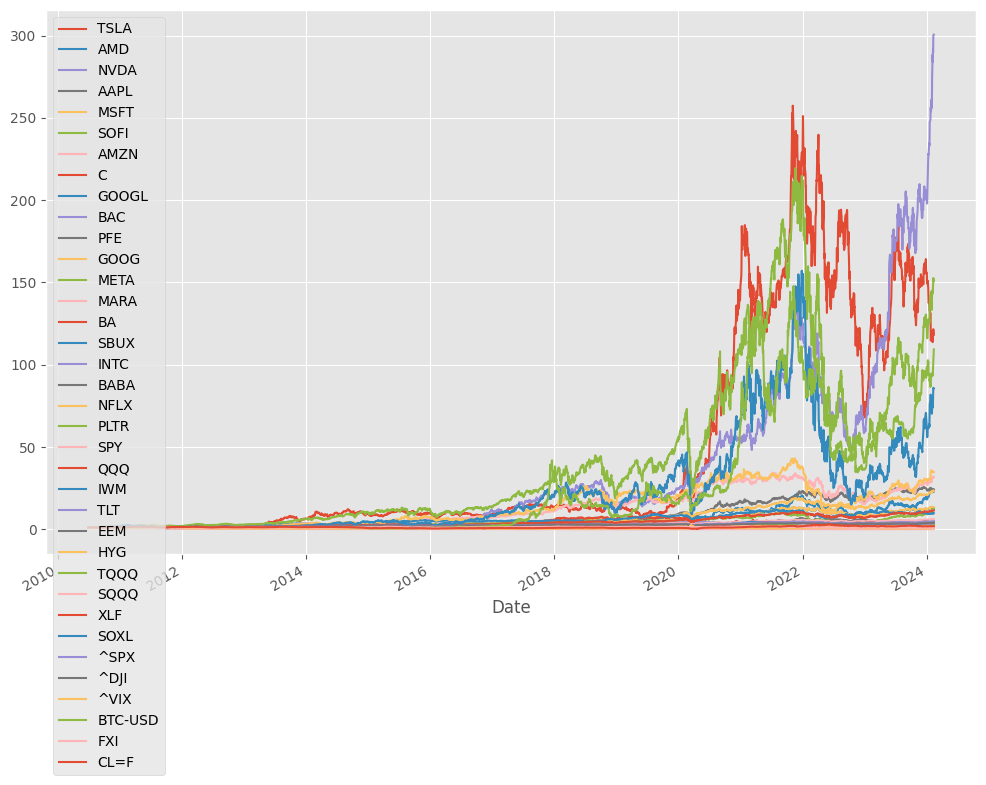

In [161]:
returns.cumsum().apply(np.exp).plot(figsize = (12, 8))
plt.show()

In [162]:
returns.describe()

,TSLA,AMD,NVDA,AAPL,MSFT,SOFI,AMZN,C,GOOGL,BAC,...,TQQQ,SQQQ,XLF,SOXL,^SPX,^DJI,^VIX,BTC-USD,FXI,CL=F
count,"3,428.0000","3,428.0000","3,428.0000","3,428.0000","3,428.0000",781.0000,"3,428.0000","3,428.0000","3,428.0000","3,428.0000",...,"3,428.0000","3,428.0000","3,428.0000","3,428.0000","3,428.0000","3,428.0000","3,428.0000","2,366.0000","3,428.0000","3,424.0000"
mean,0.0014,0.0009,0.0017,0.0009,0.0009,-0.0005,0.0010,0.0002,0.0007,0.0003,...,0.0015,-0.0031,0.0004,0.0013,0.0005,0.0004,-0.0003,0.0020,-0.0001,0.0002
std,0.0357,0.0351,0.0280,0.0177,0.0163,0.0491,0.0207,0.0214,0.0171,0.0215,...,0.0387,0.0384,0.0141,0.0535,0.0110,0.0106,0.0764,0.0442,0.0167,0.0264
min,-0.2365,-0.2775,-0.2077,-0.1377,-0.1595,-0.1525,-0.1514,-0.2144,-0.1237,-0.2271,...,-0.4226,-0.3334,-0.1474,-0.4876,-0.1277,-0.1384,-0.3141,-0.4647,-0.1086,-0.2822
25%,-0.0158,-0.0169,-0.0119,-0.0075,-0.0070,-0.0295,-0.0090,-0.0095,-0.0072,-0.0101,...,-0.0141,-0.0222,-0.0060,-0.0259,-0.0038,-0.0038,-0.0435,-0.0152,-0.0092,-0.0117
50%,0.0012,0.0000,0.0017,0.0009,0.0007,-0.0039,0.0011,0.0002,0.0008,0.0003,...,0.0035,-0.0034,0.0007,0.0039,0.0006,0.0006,-0.0064,0.0019,0.0000,0.0011
75%,0.0191,0.0185,0.0154,0.0103,0.0094,0.0262,0.0118,0.0099,0.0092,0.0107,...,0.0213,0.0137,0.0074,0.0308,0.0057,0.0053,0.0347,0.0207,0.0093,0.0123
max,0.2183,0.4206,0.2609,0.1132,0.1329,0.4569,0.1462,0.1654,0.1506,0.1638,...,0.2389,0.2832,0.1236,0.2946,0.0897,0.1076,0.7682,0.2251,0.1926,0.3196


In [163]:
summary = returns.agg(["mean", "std"]).T
summary

,mean,std
TSLA,0.0014,0.0357
AMD,0.0009,0.0351
NVDA,0.0017,0.0280
AAPL,0.0009,0.0177
MSFT,0.0009,0.0163
SOFI,-0.0005,0.0491
AMZN,0.0010,0.0207
C,0.0002,0.0214
GOOGL,0.0007,0.0171
BAC,0.0003,0.0215


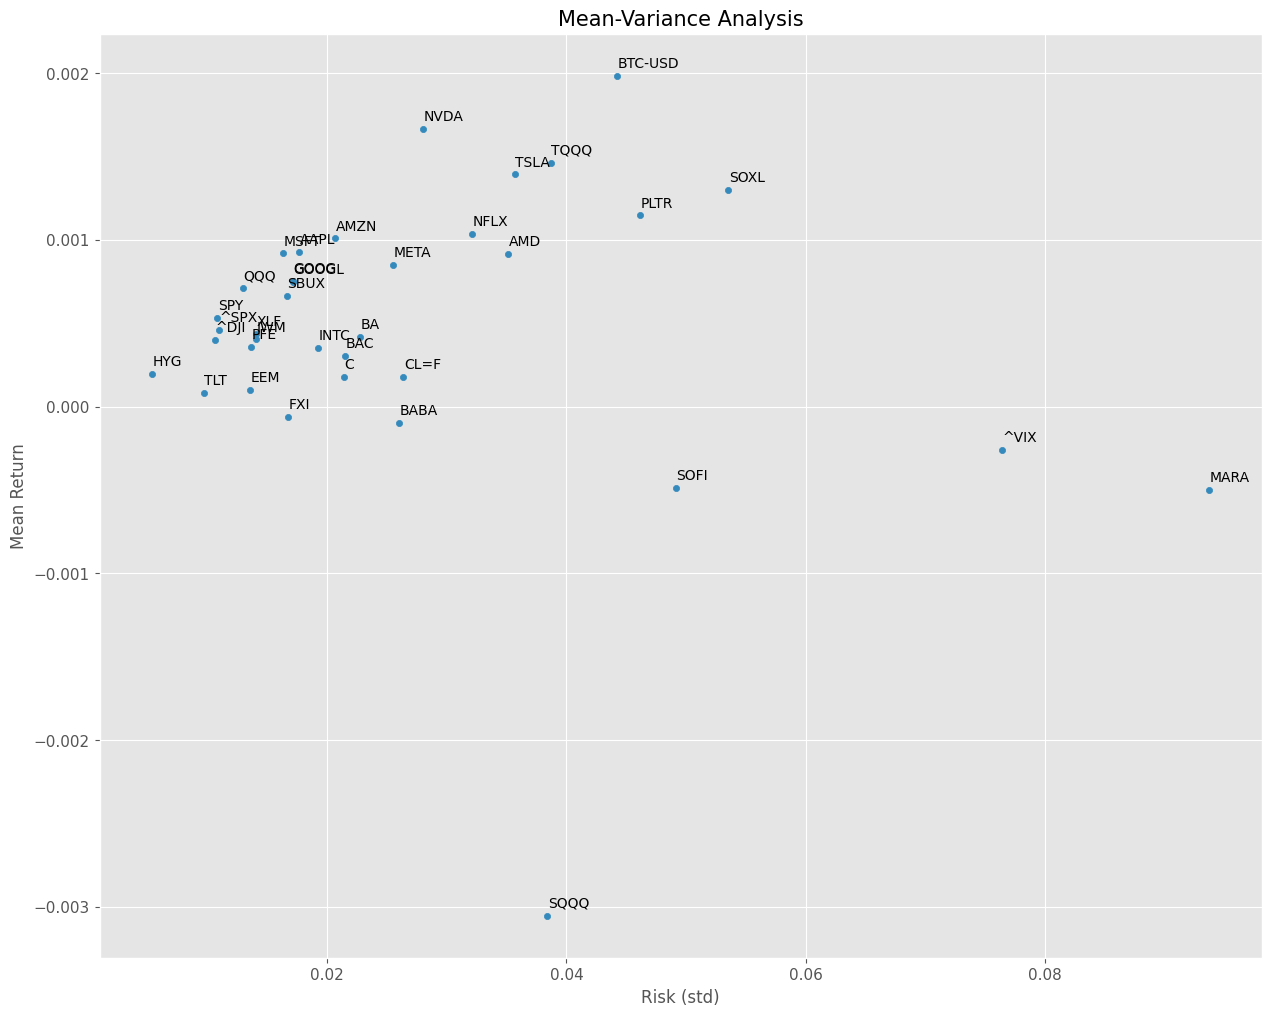

In [164]:
summary.plot(kind = "scatter", x = "std", y = "mean", figsize = (15,12), s = 20, fontsize = 11)
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "std"]+0.00005, summary.loc[i, "mean"]+0.00005), size = 10)
plt.xlabel("Risk (std)", fontsize = 12)
plt.ylabel("Mean Return", fontsize = 12)
plt.title("Mean-Variance Analysis", fontsize = 15)
plt.show()

In [165]:
CorrelationMatrix = returns.corr()

In [166]:
CorrelationMatrix

,TSLA,AMD,NVDA,AAPL,MSFT,SOFI,AMZN,C,GOOGL,BAC,...,TQQQ,SQQQ,XLF,SOXL,^SPX,^DJI,^VIX,BTC-USD,FXI,CL=F
TSLA,1.0000,0.3131,0.3772,0.3610,0.3553,0.4053,0.3547,0.2770,0.3376,0.2594,...,0.5045,-0.4954,0.3195,0.4522,0.4342,0.3705,-0.3334,0.1494,0.2990,0.1430
AMD,0.3131,1.0000,0.5619,0.3935,0.4260,0.3961,0.3783,0.3426,0.3658,0.3213,...,0.5492,-0.5477,0.3859,0.6236,0.5043,0.4375,-0.4027,0.1327,0.3513,0.1310
NVDA,0.3772,0.5619,1.0000,0.5062,0.5774,0.3936,0.4739,0.3885,0.5206,0.3684,...,0.7121,-0.7097,0.4600,0.7758,0.6299,0.5431,-0.4886,0.1965,0.4115,0.1390
AAPL,0.3610,0.3935,0.5062,1.0000,0.5932,0.3421,0.4848,0.4032,0.5607,0.3857,...,0.7821,-0.7827,0.4942,0.6318,0.6890,0.6244,-0.5036,0.1666,0.4146,0.1655
MSFT,0.3553,0.4260,0.5774,0.5932,1.0000,0.3212,0.5653,0.4543,0.6460,0.4266,...,0.8196,-0.8195,0.5607,0.6711,0.7586,0.6978,-0.5606,0.1800,0.4540,0.1738
SOFI,0.4053,0.3961,0.3936,0.3421,0.3212,1.0000,0.3726,0.2898,0.3481,0.2918,...,0.4801,-0.4834,0.3340,0.4517,0.4458,0.3575,-0.3445,0.2357,0.3057,0.0493
AMZN,0.3547,0.3783,0.4739,0.4848,0.5653,0.3726,1.0000,0.3276,0.6030,0.3126,...,0.7129,-0.7138,0.4032,0.5416,0.5962,0.4995,-0.4672,0.1550,0.3839,0.1282
C,0.2770,0.3426,0.3885,0.4032,0.4543,0.2898,0.3276,1.0000,0.4339,0.8574,...,0.5864,-0.5770,0.8906,0.5652,0.7404,0.7591,-0.5436,0.1664,0.4930,0.2598
GOOGL,0.3376,0.3658,0.5206,0.5607,0.6460,0.3481,0.6030,0.4339,1.0000,0.4081,...,0.7780,-0.7772,0.5237,0.6104,0.7032,0.6210,-0.5403,0.1665,0.4363,0.1629
BAC,0.2594,0.3213,0.3684,0.3857,0.4266,0.2918,0.3126,0.8574,0.4081,1.0000,...,0.5555,-0.5519,0.8866,0.5281,0.7090,0.7209,-0.5205,0.1385,0.4506,0.2282


In [167]:
CovarianceMatrix = returns.cov()

In [168]:
CovarianceMatrix

,TSLA,AMD,NVDA,AAPL,MSFT,SOFI,AMZN,C,GOOGL,BAC,...,TQQQ,SQQQ,XLF,SOXL,^SPX,^DJI,^VIX,BTC-USD,FXI,CL=F
TSLA,0.0013,0.0004,0.0004,0.0002,0.0002,0.0007,0.0003,0.0002,0.0002,0.0002,...,0.0007,-0.0007,0.0002,0.0009,0.0002,0.0001,-0.0009,0.0002,0.0002,0.0001
AMD,0.0004,0.0012,0.0006,0.0002,0.0002,0.0006,0.0003,0.0003,0.0002,0.0002,...,0.0007,-0.0007,0.0002,0.0012,0.0002,0.0002,-0.0011,0.0002,0.0002,0.0001
NVDA,0.0004,0.0006,0.0008,0.0003,0.0003,0.0006,0.0003,0.0002,0.0002,0.0002,...,0.0008,-0.0008,0.0002,0.0012,0.0002,0.0002,-0.0010,0.0003,0.0002,0.0001
AAPL,0.0002,0.0002,0.0003,0.0003,0.0002,0.0003,0.0002,0.0002,0.0002,0.0001,...,0.0005,-0.0005,0.0001,0.0006,0.0001,0.0001,-0.0007,0.0001,0.0001,0.0001
MSFT,0.0002,0.0002,0.0003,0.0002,0.0003,0.0003,0.0002,0.0002,0.0002,0.0001,...,0.0005,-0.0005,0.0001,0.0006,0.0001,0.0001,-0.0007,0.0001,0.0001,0.0001
SOFI,0.0007,0.0006,0.0006,0.0003,0.0003,0.0024,0.0004,0.0003,0.0003,0.0003,...,0.0010,-0.0011,0.0002,0.0014,0.0002,0.0002,-0.0012,0.0005,0.0003,0.0001
AMZN,0.0003,0.0003,0.0003,0.0002,0.0002,0.0004,0.0004,0.0001,0.0002,0.0001,...,0.0006,-0.0006,0.0001,0.0006,0.0001,0.0001,-0.0007,0.0001,0.0001,0.0001
C,0.0002,0.0003,0.0002,0.0002,0.0002,0.0003,0.0001,0.0005,0.0002,0.0004,...,0.0005,-0.0005,0.0003,0.0006,0.0002,0.0002,-0.0009,0.0002,0.0002,0.0001
GOOGL,0.0002,0.0002,0.0002,0.0002,0.0002,0.0003,0.0002,0.0002,0.0003,0.0002,...,0.0005,-0.0005,0.0001,0.0006,0.0001,0.0001,-0.0007,0.0001,0.0001,0.0001
BAC,0.0002,0.0002,0.0002,0.0001,0.0001,0.0003,0.0001,0.0004,0.0002,0.0005,...,0.0005,-0.0005,0.0003,0.0006,0.0002,0.0002,-0.0009,0.0001,0.0002,0.0001


In [169]:
returns.std()

TSLA      0.0357
AMD       0.0351
NVDA      0.0280
AAPL      0.0177
MSFT      0.0163
SOFI      0.0491
AMZN      0.0207
C         0.0214
GOOGL     0.0171
BAC       0.0215
PFE       0.0136
GOOG      0.0172
META      0.0255
MARA      0.0937
BA        0.0228
SBUX      0.0166
INTC      0.0193
BABA      0.0260
NFLX      0.0321
PLTR      0.0462
SPY       0.0108
QQQ       0.0129
IWM       0.0140
TLT       0.0097
EEM       0.0136
HYG       0.0054
TQQQ      0.0387
SQQQ      0.0384
XLF       0.0141
SOXL      0.0535
^SPX      0.0110
^DJI      0.0106
^VIX      0.0764
BTC-USD   0.0442
FXI       0.0167
CL=F      0.0264
dtype: float64

In [170]:
trading_days_a_year = returns.count() / ((returns.index[-1] - returns.index[0]).days / 365.25)
n = trading_days_a_year
n

TSLA      251.6232
AMD       251.6232
NVDA      251.6232
AAPL      251.6232
MSFT      251.6232
SOFI       57.3272
AMZN      251.6232
C         251.6232
GOOGL     251.6232
BAC       251.6232
PFE       251.6232
GOOG      251.6232
META      216.6103
MARA      217.3443
BA        251.6232
SBUX      251.6232
INTC      251.6232
BABA      173.5231
NFLX      251.6232
PLTR       62.0984
SPY       251.6232
QQQ       251.6232
IWM       251.6232
TLT       251.6232
EEM       251.6232
HYG       251.6232
TQQQ      251.6232
SQQQ      251.6232
XLF       251.6232
SOXL      251.6232
^SPX      251.6232
^DJI      251.6232
^VIX      251.6232
BTC-USD   173.6699
FXI       251.6232
CL=F      251.3296
dtype: float64

In [171]:
returns.index[0]


Timestamp('2010-06-29 00:00:00')

In [172]:
## 1st way to create sharpe ratio function, assuming rf=0
def sharpe(series,N,rf):
    mean = series.mean() * N - rf
    std = series.std()*np.sqrt(N)
    return mean/std

<Axes: >

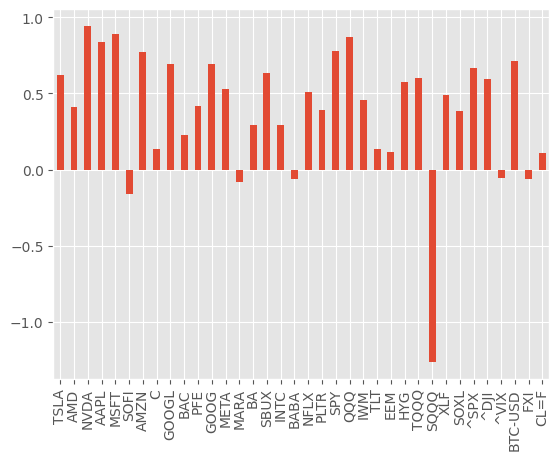

In [173]:
returns.apply(sharpe,N=252, rf = 0).plot.bar()

In [174]:
## 2nd way to create sharpe ratio function

def sharpe_ratio(return_series, rf = 0):
    
    if return_series.std() == 0:
        return np.nan
    else:
        return (return_series.mean() - rf) / return_series.std() * np.sqrt(return_series.count() / ((return_series.index[-1] - return_series.index[0]).days / 365.25))

<Axes: >

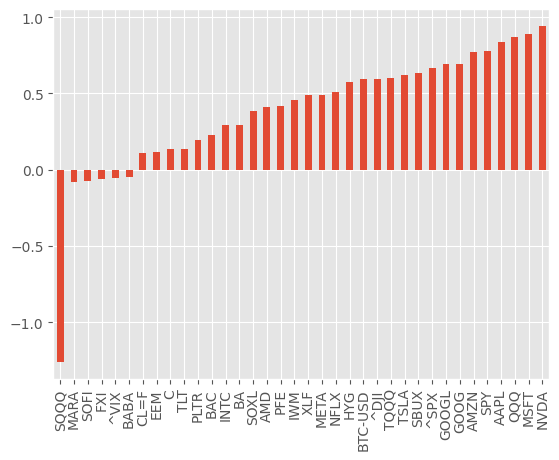

In [175]:
returns.apply(sharpe_ratio, rf = 0).sort_values(ascending = True).plot.bar()

In [176]:
## 3rd way to create sharpe ratio function

def sharpe_ratio(return_series, rf = 0):
    
    if return_series.std() == 0:
        return np.nan
    else:
        return (return_series.mean() - rf) / return_series.std() * np.sqrt(252)

<Axes: >

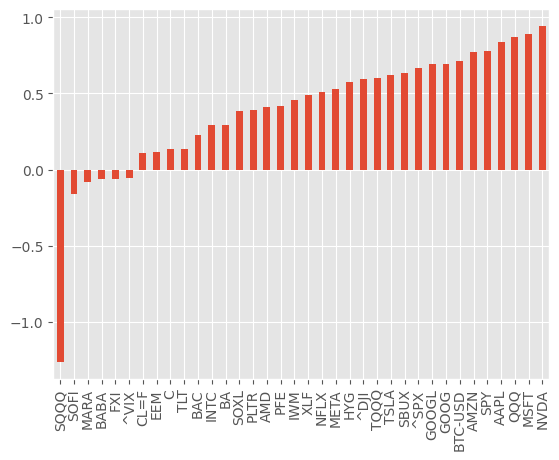

In [177]:
returns.apply(sharpe_ratio, rf = 0).sort_values(ascending = True).plot.bar()

In [178]:
#### Based on Udemy courses on Python, Performance optimization and risk management for trading##

def sortino_ratio(time_series, target_min_return = 0):
    excess_returns = (time_series - target_min_return)
    downside_deviation = np.sqrt(np.mean(np.where(excess_returns < 0, excess_returns, 0)**2))
    if downside_deviation == 0:
        return np.nan
    else:
        sortino = (time_series.mean() - target_min_return) / downside_deviation * np.sqrt(time_series.count() / ((time_series.index[-1] - time_series.index[0]).days / 365.25))
        return sortino

<Axes: >

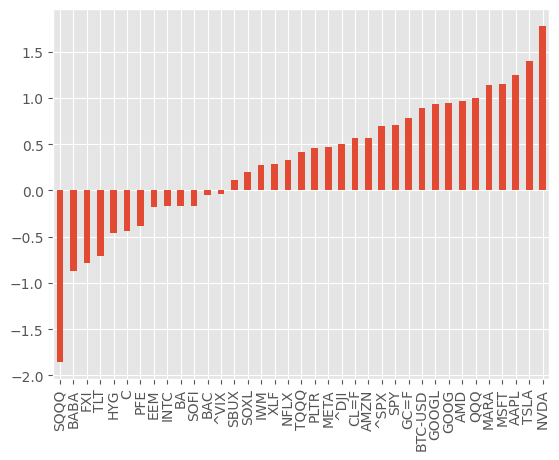

In [68]:
returns.apply(sortino_ratio).sort_values(ascending = True).plot.bar()

In [179]:
def maximum_drawdown(time_series):
    cum_returns = time_series.cumsum().apply(np.exp)
    cum_max = cum_returns.cummax()
    drawdown = (cum_max - cum_returns)/cum_max
    MDD = drawdown.max()
    return MDD

<Axes: >

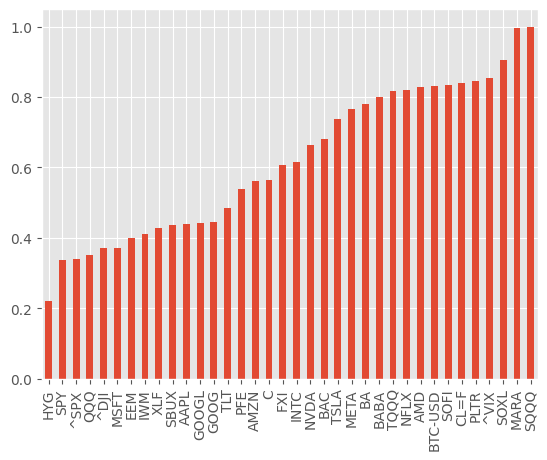

In [180]:
returns.apply(maximum_drawdown).sort_values().plot.bar()

In [181]:
## CAGR = Compounded annual growth rate
def calculate_cagr(time_series):
    return np.exp(time_series.sum())**(1/((time_series.index[-1] - time_series.index[0]).days / 365.25)) - 1

In [182]:
### calmar ratio is more applicable for funds performance than individual stock performance

def calmar(time_series):
    
    MDD = maximum_drawdown(time_series)
    if MDD == 0:
        return np.nan
    else:
        cagr = calculate_cagr(time_series)
        calmar = cagr / MDD
        return calmar

<Axes: >

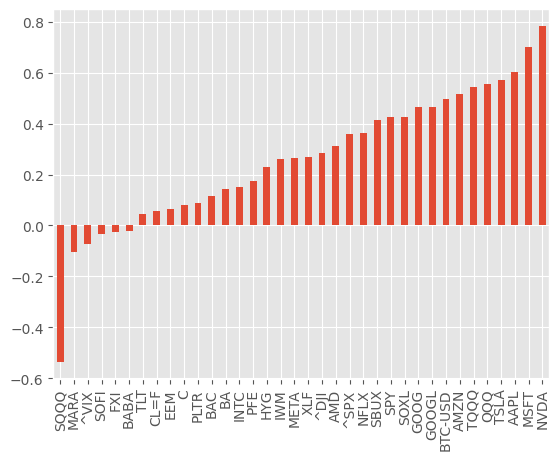

In [183]:
returns.apply(calmar).sort_values().plot.bar()

In [184]:
def kelly_criterion(time_series): # assuming series with log returns
    
    time_series = np.exp(time_series) - 1
    if time_series.var() == 0:
        return np.nan
    else:
        return time_series.mean() / time_series.var()

<Axes: >

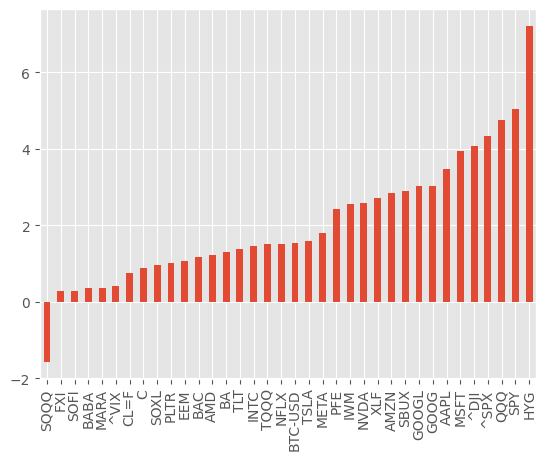

In [185]:
returns.apply(kelly_criterion).sort_values().plot.bar()

In [188]:
## Based on Udemy courses on Python, Performance optimization and risk management for trading & Ryan O'Connell CFA's courses##

In [ ]:
## Below are different Var Methodologies, Historical, parametric, Montecarlo etc. 

In [209]:
total_portfolio = 500000
weights = np.array([1/len(returns.columns)]*len(returns.columns))
weights

array([0.02777778, 0.02777778, 0.02777778, 0.02777778, 0.02777778,
       0.02777778, 0.02777778, 0.02777778, 0.02777778, 0.02777778,
       0.02777778, 0.02777778, 0.02777778, 0.02777778, 0.02777778,
       0.02777778, 0.02777778, 0.02777778, 0.02777778, 0.02777778,
       0.02777778, 0.02777778, 0.02777778, 0.02777778, 0.02777778,
       0.02777778, 0.02777778, 0.02777778, 0.02777778, 0.02777778,
       0.02777778, 0.02777778, 0.02777778, 0.02777778, 0.02777778,
       0.02777778])

In [210]:
historical_returns = (returns * weights).sum(axis =1)


In [211]:
days = 10

range_returns = historical_returns.rolling(window = days).sum()
range_returns = range_returns.dropna()
range_returns

Date
2010-07-13   0.0234
2010-07-14   0.0268
2010-07-15   0.0333
2010-07-16   0.0145
2010-07-19   0.0355
              ...  
2024-02-06   0.0218
2024-02-07   0.0206
2024-02-08   0.0284
2024-02-09   0.0439
2024-02-12   0.0371
Length: 3420, dtype: float64

In [212]:
confidence_level = 0.99

VaR = -np.percentile(range_returns, 100 - (confidence_level * 100))*portfolio_value
VaR

92761.79040497637

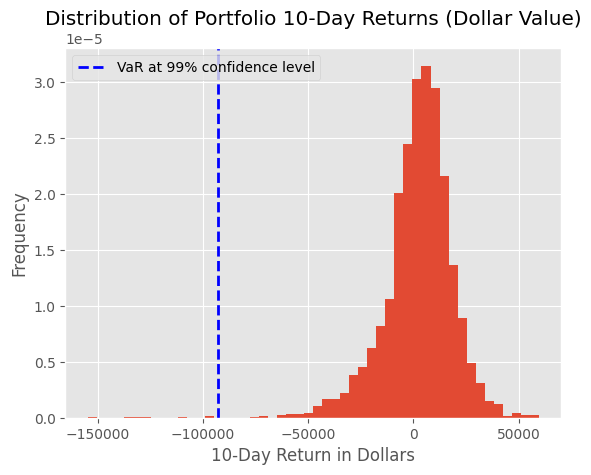

In [216]:

range_returns = historical_returns.rolling(window=days).sum()
range_returns = range_returns.dropna()

range_returns_dollar = range_returns * total_portfolio

plt.hist(range_returns_dollar.dropna(), bins=50, density=True)
plt.xlabel(f'{days}-Day Return in Dollars')
plt.ylabel('Frequency')
plt.title(f'Distribution of Portfolio {days}-Day Returns (Dollar Value)')
plt.axvline(-VaR, color='b', linestyle='dashed', linewidth=2, label=f'VaR at {confidence_level:.0%} confidence level')
plt.legend()
plt.show()

In [ ]:
## Parametric VaR

In [217]:
cov_matrix = returns.cov() * 252
portfolio_std_dev = np.sqrt(weights.T @ cov_matrix @ weights)

In [218]:
confidence_levels = [0.90, 0.95, 0.99]

VaRs = []
for cl in confidence_levels:
    VaR = portfolio_value * (norm.ppf(1 - cl) * portfolio_std_dev * np.sqrt(days / 252) - historical_returns.mean() * days)
    VaRs.append(VaR)

In [219]:
print(f'{"Confidence Level":<20} {"Value at Risk":<20}')
print('-' * 40)

for cl, VaR in zip(confidence_levels, VaRs):
    print(f'{cl * 100:>6.0f}%: {"":<8} ${VaR:>10,.2f}')

Confidence Level     Value at Risk       
----------------------------------------
    90%:          $-55,379.98
    95%:          $-69,796.98
    99%:          $-96,840.87


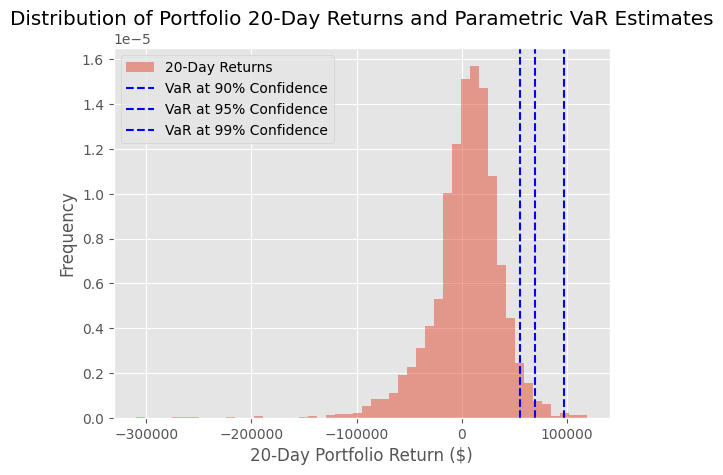

In [233]:
# Convert returns to dollar values for the histogram
historical_x_day_returns_dollar = range_returns * total_portfolio

# Plot the histogram
plt.hist(historical_x_day_returns_dollar, bins=50, density=True, alpha=0.5, label=f'{days}-Day Returns')

# Add vertical lines representing VaR at each confidence level
for cl, VaR in zip(confidence_levels, VaRs):
    plt.axvline(x=-VaR, linestyle='--', color='b', label='VaR at {}% Confidence'.format(int(cl * 100)))

plt.xlabel(f'{days}-Day Portfolio Return ($)')
plt.ylabel('Frequency')
plt.title(f'Distribution of Portfolio {days}-Day Returns and Parametric VaR Estimates')
plt.legend()
plt.show()

In [225]:

def expected_return(weights, returns):
    return np.sum(returns.mean()*weights)


def standard_deviation (weights, cov_matrix):
    variance = weights.T @ cov_matrix @ weights
    return np.sqrt(variance)

In [226]:
### Create a covariance matrix for all the securities
cov_matrix = returns.cov()
print(cov_matrix)

           TSLA     AMD    NVDA    AAPL    MSFT    SOFI    AMZN       C  \
TSLA     0.0013  0.0004  0.0004  0.0002  0.0002  0.0007  0.0003  0.0002   
AMD      0.0004  0.0012  0.0006  0.0002  0.0002  0.0006  0.0003  0.0003   
NVDA     0.0004  0.0006  0.0008  0.0003  0.0003  0.0006  0.0003  0.0002   
AAPL     0.0002  0.0002  0.0003  0.0003  0.0002  0.0003  0.0002  0.0002   
MSFT     0.0002  0.0002  0.0003  0.0002  0.0003  0.0003  0.0002  0.0002   
SOFI     0.0007  0.0006  0.0006  0.0003  0.0003  0.0024  0.0004  0.0003   
AMZN     0.0003  0.0003  0.0003  0.0002  0.0002  0.0004  0.0004  0.0001   
C        0.0002  0.0003  0.0002  0.0002  0.0002  0.0003  0.0001  0.0005   
GOOGL    0.0002  0.0002  0.0002  0.0002  0.0002  0.0003  0.0002  0.0002   
BAC      0.0002  0.0002  0.0002  0.0001  0.0001  0.0003  0.0001  0.0004   
PFE      0.0001  0.0001  0.0001  0.0001  0.0001  0.0000  0.0001  0.0001   
GOOG     0.0002  0.0002  0.0002  0.0002  0.0002  0.0003  0.0002  0.0002   
META     0.0003  0.0003  

In [227]:
### Create an equally weighted portfolio and find total portfolio expected return and standard deviation
total_portfolio = 1000000
weights = np.array([1/len(symbols)]*len(symbols))
portfolio_expected_return = expected_return(weights, returns)
portfolio_std_dev = standard_deviation (weights, cov_matrix)

In [228]:
def random_z_score():
    return np.random.normal(0, 1)

### Create a function to calculate scenarioGainLoss
days = 20

def scenario_gain_loss(portfolio_value, portfolio_std_dev, z_score, days):
    return portfolio_value * portfolio_expected_return * days + portfolio_value * portfolio_std_dev * z_score * np.sqrt(days)


In [229]:

simulations = 1000
scenarioReturn = []

for i in range(simulations):
    z_score = random_z_score()
    scenarioReturn.append(scenario_gain_loss(portfolio_value, portfolio_std_dev, z_score, days))

In [230]:
### Specify a confidence interval and calculate the Value at Risk (VaR)
confidence_interval = 0.99
VaR = -np.percentile(scenarioReturn, 100 * (1 - confidence_interval))
print(VaR)

111069.79636331988


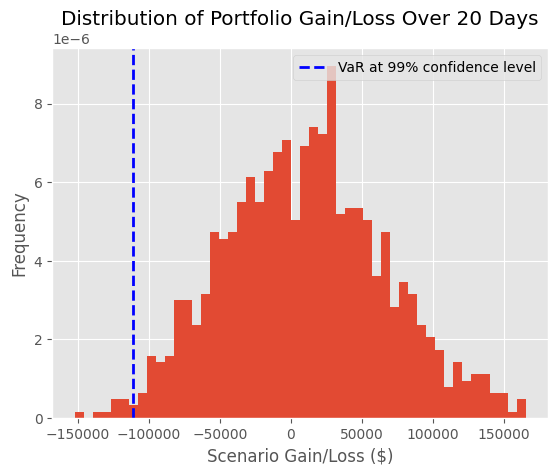

In [232]:
### Plot the results of all 10000 scenarios
plt.hist(scenarioReturn, bins=50, density=True)
plt.xlabel('Scenario Gain/Loss ($)')
plt.ylabel('Frequency')
plt.title(f'Distribution of Portfolio Gain/Loss Over {days} Days')
plt.axvline(-VaR, color='b', linestyle='dashed', linewidth=2, label=f'VaR at {confidence_interval:.0%} confidence level')
plt.legend()
plt.show()